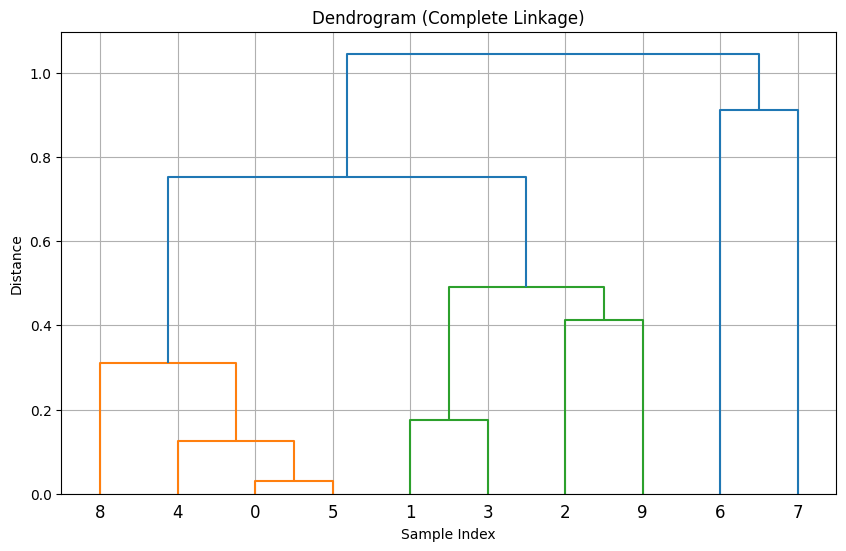

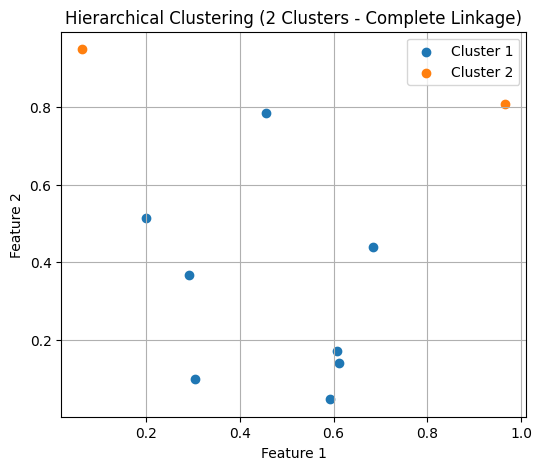

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster

X = np.random.rand(10, 2)

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def compute_distance_matrix(clusters):
    n = len(clusters)
    dmat = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            d = np.max([euclidean(a, b) for a in clusters[i] for b in clusters[j]])
            dmat[i, j] = dmat[j, i] = d
    return dmat

clusters = [[x] for x in X]
merge_history = []
cluster_indices = list(range(len(clusters)))
next_cluster_id = len(clusters)

while len(clusters) > 1:
    dmat = compute_distance_matrix(clusters)
    i, j = np.unravel_index(np.argmin(dmat), dmat.shape)
    dist = dmat[i, j]

    merge_history.append([cluster_indices[i], cluster_indices[j], dist, len(clusters[i]) + len(clusters[j])])

    new_cluster = clusters[i] + clusters[j]
    clusters = [clusters[k] for k in range(len(clusters)) if k not in (i, j)]
    cluster_indices = [cluster_indices[k] for k in range(len(cluster_indices)) if k not in (i, j)]

    clusters.append(new_cluster)
    cluster_indices.append(next_cluster_id)
    next_cluster_id += 1

linkage_matrix = np.array(merge_history)


plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(X)))
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

labels = fcluster(linkage_matrix, t=2, criterion='maxclust')

plt.figure(figsize=(6, 5))
for cluster_id in np.unique(labels):
    cluster_points = X[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
plt.title("Hierarchical Clustering (2 Clusters - Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
